# CDS 230 - Modeling and Simulation 1 - Fall 2019

# Monte Carlo Simulation Cont.

**Lecturer:** Dr. Hamdi Kavak

**Email:** hkavak@gmu.edu

**Lecture:** 11/18/2019

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Yahtzee example revisited

In [5]:
def yahtzee():
    number_of_dice_kept = 0
    value_we_keep = 0

    for i in range(3):
        dice = np.random.randint(1,7,size=5-number_of_dice_kept)

        if value_we_keep > 0:
            for die in dice:
                if die == value_we_keep:
                    number_of_dice_kept = number_of_dice_kept + 1
        else:
            counts = np.zeros(6)
            for die in dice:
                counts[die-1] += 1

            number_of_dice_kept = int(counts.max())
            if number_of_dice_kept == 1:
                value_we_keep = 0
                number_of_dice_kept = 0
            else:
                value_we_keep = counts.argmax() + 1
    # option 1
    return number_of_dice_kept == 5 
    
    # Option 2
    # if number_of_dice_kept == 5:
    #     return True
    # else:
    #     return False
        

In [21]:
# monte carlo simulation
N=100000
number_of_yahtzee_scores = 0

for i in range(N):
    outcome = yahtzee()
    if outcome == True:
        number_of_yahtzee_scores = number_of_yahtzee_scores + 1

print("Ratio:", number_of_yahtzee_scores/N)
print("Percentage:", 100 * number_of_yahtzee_scores/N)

Ratio: 0.04723
Percentage: 4.723


## Determining number of runs (N)

### N=100

In [29]:
# 11/18/2019 lecture slide #7
N=100 # step 1
all_results_100 = []

for j in range(100): # step 5
    np.random.seed(j) # step 2

    number_of_yahtzee_scores = 0

    for i in range(N): # Step 3
        outcome = yahtzee()
        if outcome == True:
            number_of_yahtzee_scores = number_of_yahtzee_scores + 1

    estimated_result = number_of_yahtzee_scores/N # step 4
    all_results_100.append(estimated_result)

print(all_results_100)

[0.08, 0.04, 0.03, 0.01, 0.03, 0.04, 0.06, 0.03, 0.03, 0.06, 0.03, 0.02, 0.01, 0.08, 0.05, 0.02, 0.02, 0.01, 0.02, 0.05, 0.04, 0.05, 0.05, 0.05, 0.04, 0.05, 0.08, 0.07, 0.06, 0.07, 0.03, 0.05, 0.03, 0.04, 0.03, 0.06, 0.04, 0.03, 0.08, 0.07, 0.06, 0.08, 0.05, 0.06, 0.04, 0.06, 0.08, 0.06, 0.03, 0.05, 0.08, 0.02, 0.02, 0.04, 0.06, 0.06, 0.05, 0.04, 0.06, 0.04, 0.06, 0.02, 0.05, 0.07, 0.05, 0.02, 0.02, 0.05, 0.05, 0.08, 0.06, 0.03, 0.05, 0.02, 0.01, 0.02, 0.05, 0.09, 0.1, 0.03, 0.09, 0.02, 0.05, 0.03, 0.03, 0.03, 0.04, 0.05, 0.06, 0.09, 0.04, 0.07, 0.05, 0.04, 0.03, 0.05, 0.08, 0.03, 0.07, 0.03]


(array([ 4., 12., 18., 13., 20., 14.,  6.,  9.,  3.,  1.]),
 array([0.01 , 0.019, 0.028, 0.037, 0.046, 0.055, 0.064, 0.073, 0.082,
        0.091, 0.1  ]),
 <a list of 10 Patch objects>)

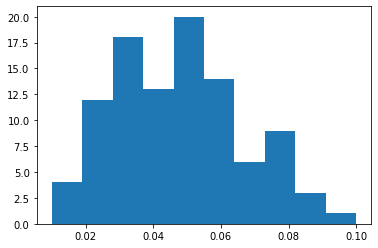

In [30]:
plt.hist(all_results_100)

### N=1000

[0.047, 0.044, 0.043, 0.042, 0.04, 0.043, 0.044, 0.046, 0.037, 0.044, 0.049, 0.036, 0.035, 0.045, 0.035, 0.04, 0.048, 0.044, 0.052, 0.043, 0.041, 0.048, 0.047, 0.04, 0.054, 0.047, 0.053, 0.043, 0.043, 0.05, 0.043, 0.04, 0.046, 0.049, 0.051, 0.037, 0.05, 0.05, 0.051, 0.046, 0.044, 0.053, 0.048, 0.044, 0.058, 0.046, 0.05, 0.056, 0.038, 0.056, 0.051, 0.052, 0.042, 0.044, 0.045, 0.05, 0.047, 0.046, 0.044, 0.047, 0.036, 0.04, 0.036, 0.034, 0.043, 0.053, 0.038, 0.053, 0.055, 0.045, 0.057, 0.04, 0.045, 0.04, 0.038, 0.041, 0.046, 0.051, 0.058, 0.053, 0.04, 0.053, 0.047, 0.041, 0.044, 0.045, 0.044, 0.053, 0.046, 0.046, 0.055, 0.042, 0.048, 0.044, 0.055, 0.056, 0.047, 0.042, 0.049, 0.047]


(array([ 6.,  5., 11., 11., 16., 20.,  8., 13.,  4.,  6.]),
 array([0.034 , 0.0364, 0.0388, 0.0412, 0.0436, 0.046 , 0.0484, 0.0508,
        0.0532, 0.0556, 0.058 ]),
 <a list of 10 Patch objects>)

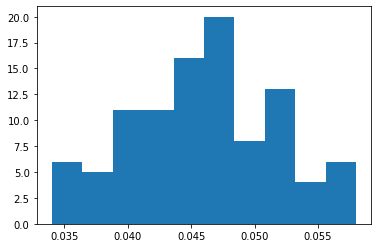

In [31]:
# 11/18/2019 lecture slide #7
N=1000 # step 1
all_results_1000 = []

for j in range(100): # step 5
    np.random.seed(j) # step 2

    number_of_yahtzee_scores = 0

    for i in range(N): # Step 3
        outcome = yahtzee()
        if outcome == True:
            number_of_yahtzee_scores = number_of_yahtzee_scores + 1

    estimated_result = number_of_yahtzee_scores/N # step 4
    all_results_1000.append(estimated_result)

print(all_results_1000)
plt.hist(all_results_1000)

In [32]:
# step 6 - calculating the standard deviation
standard_dev_100 = np.std(all_results_100)
print("Standard deviation for N=100:",standard_dev_100)

standard_dev_1000 = np.std(all_results_1000)
print("Standard deviation for N=1000:",standard_dev_1000)

Standard deviation for N=100: 0.020961631615883335
Standard deviation for N=1000: 0.005692547760010451


In [35]:
# calculating the confidence interval
mean_100 = np.mean(all_results_100) 
print(mean_100)

mean_1000 = np.mean(all_results_1000) 
print(mean_1000)

0.04690000000000001
0.04592999999999999


In [37]:
lower_bound_of_confidence_interval_100 = mean_100 - 1.96*standard_dev_100
upper_bound_of_confidence_interval_100 = mean_100 + 1.96*standard_dev_100

In [38]:
# if we use N=100
print("95% of the time, values will fall within ",lower_bound_of_confidence_interval_100,",",upper_bound_of_confidence_interval_100)

95% of the time, values will fall within  0.0058152020328686715 , 0.08798479796713135


In [39]:
lower_bound_of_confidence_interval_1000 = mean_1000 - 1.96*standard_dev_1000
upper_bound_of_confidence_interval_1000 = mean_1000 + 1.96*standard_dev_1000

In [41]:
# if we use N=1000
print("95% of the time, values will fall within ",lower_bound_of_confidence_interval_1000,",",upper_bound_of_confidence_interval_1000)

95% of the time, values will fall within  0.034772606390379504 , 0.05708739360962048


### Compact version

In [42]:
def monte_carlo_run(N,number_of_repeats):
    all_results = []

    for j in range(number_of_repeats): # step 5
        np.random.seed(j) # step 2

        number_of_yahtzee_scores = 0

        for i in range(N): # Step 3
            outcome = yahtzee()
            if outcome == True:
                number_of_yahtzee_scores = number_of_yahtzee_scores + 1

        estimated_result = number_of_yahtzee_scores/N # step 4
        all_results.append(estimated_result)

    return all_results

In [43]:
results = monte_carlo_run(N=1000, number_of_repeats=1000)

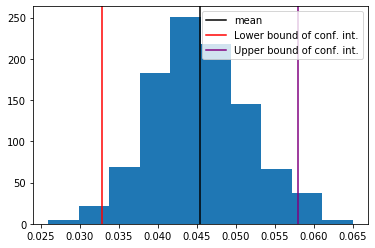

In [45]:
mean = np.mean(results)
std = np.std(results)
plt.hist(results)
plt.axvline(x=mean,color="black",label="mean")
plt.axvline(x=mean-1.96*std,color="red",label="Lower bound of conf. int.")
plt.axvline(x=mean+1.96*std,color="purple",label="Upper bound of conf. int.")
plt.legend()
plt.show()